<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Groupby & Useful Operations</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [BASIC AGGREGATION METHODS](#1)
* [GROUPBY & AGGREGATION](#2)
    * [DataFrame.groupby()](#2.1)
* [DATAFRAME/SERIES OPERATIONS](#3)
    * [.aggregate()/agg()](#3.1)
        * [DataFrame.agg()](#3.1.1)
        * [DataFrame.groupby().agg()](#3.1.2)
    * [.filter()](#3.2)
        * [DataFrame.groupby().filter()](#3.2.1)
    * [.transform()](#3.3)
        * [DataFrame.groupby().transform()](#3.3.1)
    * [.apply()](#3.4)
        * [Series.apply() - df["col"].apply()](#3.4.1)
        * [DataFrame.apply()](#3.4.2)
    * [.applymap()](#3.5)
    * [.map()](#3.6)
        * [Series.map() - df["col"].map()](#3.6.1)
        * [DataFrame.map()](#3.6.2)
    * [df.transform() vs df.apply()](#3.7)
* [pivot() vs pivot_table()](#8)
* [.stack() & .unstack()](#9)
    * [.stack()](#9.1)
    * [.unstack()](#9.2)
* [THE END OF THE SESSION - 05 & 06](#10)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy you can import it as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Basic Aggregation Methods</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One of the most basic analysis functions is grouping and aggregating data. In some cases, this level of analysis may be sufficient to answer real-world/business questions. In other instances, this activity might be the first step in a more complex data science analysis. In pandas, the groupby function can be combined with one or more aggregation functions to quickly and easily summarize data. This concept is deceptively simple and most new pandas users will understand this concept. However, they might be surprised at how useful complex aggregation functions can be for supporting sophisticated analysis [Source](https://pbpython.com/groupby-agg.html).

An essential piece of analysis of large data is efficient summarization: computing aggregations, such as ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset. The aggregate() method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis [Source](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html).

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays which are also used for Pandas Dataframes [Pandas Official Documentation](https://pandas.pydata.org/docs/reference/frame.html); we'll discuss and demonstrate some of them here:

* ``count()`` ==> Counts non-NA cells for each column or row.
* ``mean()`` ==> Returns the mean of the values over the requested axis.
* ``median()`` ==> Returns the median of the values over the requested axis.
* ``min()`` ==> Returns the minimum of the values over the requested axis.
* ``max()`` ==> Returns the maximum of the values over the requested axis.
* ``std()`` ==> Returns sample standard deviation over requested axis.
* ``var()`` ==> Returns unbiased variance over requested axis.
* ``sum()`` ==> Returns the sum of the values over the requested axis.
* ``idxmin()`` ==> Returns index of first occurrence of minimum over requested axis.
* ``idxmax()`` ==> Returns index of first occurrence of maximum over requested axis.
* ``corr()`` ==> Computes pairwise correlation of columns, excluding NA/null values.

To sum up, in this session, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [38]:
df = pd.DataFrame(np.random.randint(0, 100, size=(7, 5)), 
                  columns=["x1", "x2", "x3", "x4", "x5"])
df

,x1,x2,x3,x4,x5
0,39,76,18,20,48
1,1,42,50,49,40
2,4,42,48,28,55
3,15,65,53,54,14
4,59,90,96,24,7
5,94,16,84,34,84
6,88,38,94,23,49


In [8]:
print(df.count())

x1    7
x2    7
x3    7
x4    7
x5    7
dtype: int64


In [13]:
print(df[["x1", "x2"]].count())
df.x1.count()

x1    7
x2    7
dtype: int64


7

In [11]:
print(df.count(axis = 1))  # her satır icin sutunları saga dogru saydı

0    5
1    5
2    5
3    5
4    5
5    5
6    5
dtype: int64


In [14]:
df.mean()

x1    41.714286
x2    32.428571
x3    46.000000
x4    48.285714
x5    48.000000
dtype: float64

Pandas dataframe.idxmin() function returns index of first occurrence of minimum over requested axis. While finding the index of the minimum value across any index, all NA/null values are excluded.

In [15]:
df.idxmin()
# serilerde argmin ve argmax kullanılır.dataframede ise çalışmaz argmin-argmax.
# idxmin-idxmax var bunun yerine. ama idxmin serie icin, yani bir df'nin sutunu icin de calisir

x1    4
x2    0
x3    3
x4    0
x5    3
dtype: int64

In [39]:
#
df.loc[df.idxmin(), "x2"]

1    42
5    16
0    76
0    76
4    90
Name: x2, dtype: int64

In [40]:
df.x1.idxmin()

1

In [16]:
df.idxmax()

x1    5
x2    4
x3    6
x4    4
x5    4
dtype: int64

In [18]:
df.idxmax(axis= 1)
# birinci satırda en büyük değer x3 sutununda, 2. satırda x3, 3. satırda x5 sutununda.....

0    x3
1    x3
2    x5
3    x4
4    x4
5    x5
6    x3
dtype: object

In [45]:
df.describe()
# describe functionun yptigi da aggregate aslinda.

,x1,x2,x3,x4,x5
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,42.857143,52.714286,63.285714,33.142857,42.428571
std,38.658456,25.421213,28.894719,13.371968,25.915614
min,1.000000,16.000000,18.000000,20.000000,7.000000
25%,9.500000,40.000000,49.000000,23.500000,27.000000
50%,39.000000,42.000000,53.000000,28.000000,48.000000
75%,73.500000,70.500000,89.000000,41.500000,52.000000
max,94.000000,90.000000,96.000000,54.000000,84.000000


# nlargest() - nsmallest()

In [167]:
df.nlargest(2, ["x1"])  # nlargest(2) ilgili columndaki en büyük 2 tanesini getirir. default olaral 5

,x1,x2,x3,x4,x5
5,94,16,84,34,84
6,88,38,94,23,49


In [168]:
# tüm satırı değil de sadece ilgili value ve bulunduğu indexi getirmek istersek bu.
df["x1"].nlargest(2)

5    94
6    88
Name: x1, dtype: int64

In [172]:
df.nsmallest(1,["x3"])

,x1,x2,x3,x4,x5
0,39,76,18,20,48


In [173]:
df["x3"].nsmallest(1)

0    18
Name: x3, dtype: int64

In [177]:
df.nsmallest(1,["x4"])

,x1,x2,x3,x4,x5
0,39,76,18,20,48


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Groupby & Aggregation</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In Exploratory Data Analysis (EDA), we often would like to analyze data by some categories. In SQL, the GROUP BY statement groups row that has the same category values into summary rows. In Pandas, SQL's GROUP BY operation is performed using the similarly named **``groupby()``** method. Pandas' groupby() allows us to split data into separate groups to perform computations for better analysis [Source](https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5).

In this part of the session, you'll learn the "group by" process (split-apply-combine) and how to use Pandas's groupby() function to group data and perform operations.

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby()</p>

<a id="2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``groupby()``** method groups DataFrame using a mapper or by a Series of columns. A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups [Official Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In other words, the **``groupby()``** method allows you to group rows of data together and call aggregate functions.

**``DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)``**

Groupby operation involves some of the following operations on the original object.

-- Splitting the Object

-- Applying a function

-- Combining the results

We group and classify **categorical data.**

**Groupby method is used with aggregation functions such as:**

mean,

standard deviation,

max and min,

count.

sum.

Groupby gruplar ama object olarak tutar (**lazy object**), aggregation functions da o grupları ortalama, min, max gibi islemlere gore tek bir veride gruplayıp sunar. aggregate combine kismi bir nevi. groupby split ve apply. 

In [19]:
df2 = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                               'Parrot', 'Parrot'],
                    'Max Speed': [380., 370., 24., 26.]})
print(df2)
print()
df2.groupby('Animal').mean()

   Animal  Max Speed
0  Falcon      380.0
1  Falcon      370.0
2  Parrot       24.0
3  Parrot       26.0



,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [20]:
print(df2.groupby("Animal").max())
print()
print(df2.groupby("Animal").min())
print("*"*15)
print(df2.groupby("Animal").std())
print(df2.groupby("Animal").count())
print("*"*15)
print(df2.groupby("Animal").sum())

        Max Speed
Animal           
Falcon      380.0
Parrot       26.0

        Max Speed
Animal           
Falcon      370.0
Parrot       24.0
***************
        Max Speed
Animal           
Falcon   7.071068
Parrot   1.414214
        Max Speed
Animal           
Falcon          2
Parrot          2
***************
        Max Speed
Animal           
Falcon      750.0
Parrot       50.0


In [48]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'GOOG', 'MSFT', 'GOOG', 'MSFT'],
        'Department':['HR', 'IT', 'IT', 'HR', 'HR', 'IT', 'IT', 'HR'],
        'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah', 'Tom', 'Terry'],
        'Age':[30, 28, 35, 40, 42, 25, 32, 48],
        'Sales':[200, 120, 340, 124, 243, 350, 180, 220]}
df1 = pd.DataFrame(data)
df1

,Company,Department,Person,Age,Sales
0,GOOG,HR,Sam,30,200
1,GOOG,IT,Charlie,28,120
2,MSFT,IT,Amy,35,340
3,MSFT,HR,Vanessa,40,124
4,GOOG,HR,Carl,42,243
5,MSFT,IT,Sarah,25,350
6,GOOG,IT,Tom,32,180
7,MSFT,HR,Terry,48,220


**Now you can use the ``.groupby()`` method to group rows together based on a column name. For instance, let's group based on Company. This will create a DataFrameGroupBy object:**

In [49]:
df1.groupby("Company")  # lazy object

In [50]:
# let's group by companies
df1.groupby("Company").mean()

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [53]:
# let's check the average sales of companies. 
df1.groupby("Company")[["Sales"]].mean()

,Sales
Company,
GOOG,185.75
MSFT,258.50


In [51]:
df1.groupby("Department").mean()

,Age,Sales
Department,,
HR,40.0,196.75
IT,30.0,247.50


In [55]:
# şirketler için çalışanları sayalım
df1.groupby("Company")[["Company"]].count()

,Company
Company,
GOOG,4
MSFT,4


In [56]:
# ek bilgi: satır sayılarını value_counts ile de bulabiliriz
df1["Company"].value_counts()

GOOG    4
MSFT    4
Name: Company, dtype: int64

In [57]:
# hem compnay hem departmana göre gruplandıralım. önce company grubu, onun icinde de ayrı bir depatman
# gruplaması yapalım. yani 2 kademeli gruplama. bu bir kırılma noktası. artık ikiser
# aggregate degerleri oldu her bir alt grup icin. bu bir multiindex
df1.groupby(["Company", "Department"]).mean()

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

In [195]:
df1.groupby("Company").mean()

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [59]:
# bu gruplamada sales'in mean degerini getirelim
df1.groupby(["Company", "Department"])[["Sales"]].mean()

Sales
Company Department       
GOOG    HR          221.5
        IT          150.0
MSFT    HR          172.0
        IT          345.0

In [60]:
df1.groupby(["Company", "Department"])[["Sales"]].describe()

Sales                                                  \
                   count   mean        std    min     25%    50%     75%   
Company Department                                                         
GOOG    HR           2.0  221.5  30.405592  200.0  210.75  221.5  232.25   
        IT           2.0  150.0  42.426407  120.0  135.00  150.0  165.00   
MSFT    HR           2.0  172.0  67.882251  124.0  148.00  172.0  196.00   
        IT           2.0  345.0   7.071068  340.0  342.50  345.0  347.50   

                           
                      max  
Company Department         
GOOG    HR          243.0  
        IT          180.0  
MSFT    HR          220.0  
        IT          350.0

In [61]:
# lazy objecti variablesa atayalım ve ordan islem yapalım
by_comp = df1.groupby("Company")

In [62]:
by_comp.mean()

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [63]:
by_comp.min()

,Department,Person,Age,Sales
Company,,,,
GOOG,HR,Carl,28,120
MSFT,HR,Amy,25,124


# let's make some exercises on a real dataset

In [21]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [23]:
df.groupby("method")["distance"]

In [24]:
df.groupby("method")[["distance"]].mean()

,distance
method,
Astrometry,17.875000
Eclipse Timing Variations,315.360000
Imaging,67.715937
Microlensing,4144.000000
Orbital Brightness Modulation,1180.000000
Pulsar Timing,1200.000000
Pulsation Timing Variations,NaN
Radial Velocity,51.600208
Transit,599.298080


In [25]:
df.sample(10)

,method,number,orbital_period,mass,distance,year
408,Radial Velocity,1,70.460000,0.30,30.50,2005
742,Radial Velocity,4,982.000000,NaN,NaN,2014
170,Transit,1,4.124481,NaN,254.00,2010
100,Transit,1,95.273800,NaN,460.00,2009
445,Radial Velocity,1,2597.000000,1.88,33.01,2004
702,Transit,2,13.290700,NaN,1400.00,2011
35,Imaging,1,NaN,NaN,139.00,2004
406,Radial Velocity,1,157.570000,1.70,140.85,2011
373,Radial Velocity,1,184.020000,2.70,88.26,2007
970,Transit,1,4.353011,NaN,155.00,2009


In [26]:
df.groupby("method")["distance"].sum()

method
Astrometry                           35.75
Eclipse Timing Variations          1261.44
Imaging                            2166.91
Microlensing                      41440.00
Orbital Brightness Modulation      2360.00
Pulsar Timing                      1200.00
Pulsation Timing Variations           0.00
Radial Velocity                   27348.11
Transit                          134242.77
Transit Timing Variations          3313.00
Name: distance, dtype: float64

In [27]:
df.groupby("method")[["distance"]].sum()

,distance
method,
Astrometry,35.75
Eclipse Timing Variations,1261.44
Imaging,2166.91
Microlensing,41440.00
Orbital Brightness Modulation,2360.00
Pulsar Timing,1200.00
Pulsation Timing Variations,0.00
Radial Velocity,27348.11
Transit,134242.77


In [28]:
# or we can diretcly write the name of the related column
df.groupby("method").distance.sum()

method
Astrometry                           35.75
Eclipse Timing Variations          1261.44
Imaging                            2166.91
Microlensing                      41440.00
Orbital Brightness Modulation      2360.00
Pulsar Timing                      1200.00
Pulsation Timing Variations           0.00
Radial Velocity                   27348.11
Transit                          134242.77
Transit Timing Variations          3313.00
Name: distance, dtype: float64

In [29]:
# TASK: How to calculate the max speed of birds and mammals by using  groupby method?
data4 = pd.DataFrame([('bird', 389.0),
                     ('bird', 40.0), ('bird', 405.0),
                     ('mammal', 80.2),
                     ('mammal', 12.0),('mammal', 58)],
                     index=['falcon', 'parrot', 'eagle', 'lion', 'monkey', 'leopard'],
                    columns=('class', 'speed'))
data4

,class,speed
falcon,bird,389.0
parrot,bird,40.0
eagle,bird,405.0
lion,mammal,80.2
monkey,mammal,12.0
leopard,mammal,58.0


In [30]:
data4.groupby("class")[["speed"]].max()

,speed
class,
bird,405.0
mammal,80.2


In [31]:
# or
data4.groupby("class").max()

,speed
class,
bird,405.0
mammal,80.2


In [32]:
# TASK: How to calculate the avg speed of birds and mammals using  groupby method?

data4.groupby("class").mean()

,speed
class,
bird,278.000000
mammal,50.066667


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Useful Operations</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- ### `.aggregate()`
- ### `.filter()`
- ### `.transform()`
- ### `.apply()`
- ### `.applymap()`
- ### `.map()`
- ### `.pivot() & .pivot_table()`
- ### `.stack() & .unstack()`

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">.aggregate() / agg()</p>

<a id="3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.agg()</p>

<a id="3.1.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.aggregate(func=None, axis=0, *args, **kwargs)``**

Returns: scalar, Series or DataFrame

The return can be:
- scalar : when Series.agg is called with single function
- Series : when DataFrame.agg is called with a single function
- DataFrame : when DataFrame.agg is called with several functions (Returns scalar, Series or DataFrame).

The aggregation operations are always performed over an axis, either the index (default) or the column axis. This behavior is different from numpy aggregation functions (mean, median, prod, sum, std, var), where the default is to compute the aggregation of the flattened array, e.g., numpy.mean(arr_2d) as opposed to numpy.mean(arr_2d, axis=0).

**agg()** is an **alias for aggregate()**. Use the alias [Official Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html).

In [80]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10, 23, 33, 22, 11, 99, 76, 84, 45],
                   'var2': [100, 253, 333, 262, 111, 969, 405, 578, 760]})
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [65]:
# gruplamadan tüm df'de agg fonksiyonlari calistiralim
df2.agg([sum, min])

,groups,var1,var2
sum,ABCABCABC,403,3771
min,A,10,100


In [66]:
df2[["var1", "var2"]].agg([sum,min])

,var1,var2
sum,403,3771
min,10,100


In [67]:
# dict ile hangi sutuna hangi func uygulanacagini belirleyebiliriz
df2.agg({"var1":sum, "var2": min})

var1    403
var2    100
dtype: int64

In [68]:
df2.agg({"var1":[sum, "mean"], "var2": [min, max]})

,var1,var2
sum,403.000000,NaN
mean,44.777778,NaN
min,NaN,100.0
max,NaN,969.0


In [197]:
df2.agg({"var1":[sum, "mean"], "var2": [min, max]})

,var1,var2
sum,403.000000,NaN
mean,44.777778,NaN
min,NaN,100.0
max,NaN,969.0


#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().agg()</p>

<a id="3.1.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.agg(arg, *args, **kwargs)``**

Aggregates using one or more operations over the specified axis [Pandas Official Documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

[SOUREC01](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)

In [69]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [70]:
df2.groupby("groups").agg({"var1": (min, "max"), "var2":"median"})

var1       var2
        min max median
groups                
A        10  76  262.0
B        11  84  253.0
C        33  99  760.0

In [71]:
df2.groupby("groups")[["var1"]].agg([min, max])

var1    
        min max
groups         
A        10  76
B        11  84
C        33  99

In [ ]:
# let's exercise more on another dataframe

In [79]:

df11 = pd.DataFrame({"Groups" : ["A", "B", "C", "A", "B", "C"], 
                     "Var1": [10,23,33,22,11,99],
                     "Var2": [100,253,333,262,111,999]
                    })
df11

,Groups,Var1,Var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,999


In [73]:
df11.groupby("Groups").agg(["count", np.min, "median", max, "sum"])

# amin a sebebi array olması. np min func uygulayınca array cikardi. np.max desek amax olurdu o da 

Var1                       Var2                       
       count amin median max  sum count amin median  max   sum
Groups                                                        
A          2   10   16.0  22   32     2  100  181.0  262   362
B          2   11   17.0  23   34     2  111  182.0  253   364
C          2   33   66.0  99  132     2  333  666.0  999  1332

In [74]:
display(df11, df11.groupby("Groups").agg(["count", np.min, "median", max, "sum"]))

,Groups,Var1,Var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,999


Var1                       Var2                       
       count amin median max  sum count amin median  max   sum
Groups                                                        
A          2   10   16.0  22   32     2  100  181.0  262   362
B          2   11   17.0  23   34     2  111  182.0  253   364
C          2   33   66.0  99  132     2  333  666.0  999  1332

In [75]:
# or another way:
# notice that we'll write the agg function as aggregate here:
df11.groupby("Groups").aggregate([np.min, np.median, np.max])

Var1             Var2            
       amin median amax amin median amax
Groups                                  
A        10   16.0   22  100  181.0  262
B        11   17.0   23  111  182.0  253
C        33   66.0   99  333  666.0  999

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.filter()</p>

<a id="3.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.filter()</p>

<a id="3.2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Pandas **``Dataframe.filter()``** is an inbuilt function that is used to subset columns or rows of DataFrame according to labels in the particular index. The DataFrame **``filter()``** returns subset the DataFrame rows or columns according to the detailed index labels. **One thing to note that** this routine does **NOT** filter a DataFrame on its contents. The filter() function is applied to the labels of the index[Pandas Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html)

**Discards the data with some condition. It applies a filter on the results obtained from those sub dataframes. The filtered results will then be broadcast to any matching conditions in the original dataframe. In this situation, you'll obtain a condensed version of the full dataframe.**

[SOUREC01](https://www.sharpsightlabs.com/blog/pandas-filter/) & [SOURCE02](https://appdividend.com/2020/03/19/pandas-filter-pandas-dataframe-filter-in-python-example/)

In [76]:
display(df11, df11.groupby("Groups").filter(lambda x: x["Var1"].mean()< 17))

,Groups,Var1,Var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,999


,Groups,Var1,Var2
0,A,10,100
3,A,22,262


In [77]:
df11.groupby("Groups").filter(lambda x: x["Var2"].max()<300)

,Groups,Var1,Var2
0,A,10,100
1,B,23,253
3,A,22,262
4,B,11,111


In [81]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [82]:
df2.filter(["groups", "var1"])  # df2[["groups", "var1"]] bu da aynı seyi yapiyor

,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [83]:
# var ile baslayan sutunları getir
df2.filter(regex= "^var")

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [84]:
df2.filter(like = "var", axis = 1)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [85]:
df2.filter(like="1", axis = 0)

,groups,var1,var2
1,B,23,253


#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().filter()</p>

<a id="3.2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.filter(func, dropna=True, *args, **kwargs)``**
- Returns a copy of a DataFrame excluding filtered elements.
- Elements from groups are filtered if they do not satisfy the boolean criterion specified by func [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html).

In [86]:
df2.groups.unique()

array(['A', 'B', 'C'], dtype=object)

In [87]:
df2.groupby("groups").mean()

In [94]:
print(*df2.groupby("groups"), sep="\n")

('A',   groups  var1  var2
0      A    10   100
3      A    22   262
6      A    76   405)
('B',   groups  var1  var2
1      B    23   253
4      B    11   111
7      B    84   578)
('C',   groups  var1  var2
2      C    33   333
5      C    99   969
8      C    45   760)


**Example-1**

In [88]:
def filter_func(x):
    return x["var1"].mean() > 39
# fonksiyon T-F döndüren bir Fonksiyon

df2.groupby("groups").filter(filter_func)
# x değeri gruplanmis groups'tan gelecek. fonksyionda A-B-C grupları icin var1'e bakıp 
# meani 39 ustu olanları filtreleyecek

,groups,var1,var2
1,B,23,253
2,C,33,333
4,B,11,111
5,C,99,969
7,B,84,578
8,C,45,760


In [91]:
# teyit edelim
df2.groupby("groups")[["var1"]].mean()

,var1
groups,
A,36.000000
B,39.333333
C,59.000000


**Example-2**

In [96]:
# lambda ile yapalım
# 1. lambda T-F üreten bir fonksiyondur
# 2. filter'in gorevi Trueları filtreleyip dondurmek
df2.groupby("groups").filter(lambda x: x["var2"].sum() > 800)

,groups,var1,var2
1,B,23,253
2,C,33,333
4,B,11,111
5,C,99,969
7,B,84,578
8,C,45,760


In [95]:
# lambda ile ispatını yapalım: (lambda x: x expression)(x)
(lambda x: x["var2"].sum() > 800)(df2.groupby("groups"))
# burda filter yok, filterin gorevi True olanları gecirmek, boylece onların karsiligini gorecegiz

groups
A    False
B     True
C     True
Name: var2, dtype: bool

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.transform()</p>

<a id="3.3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.transform()</p>

<a id="3.3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.transform(func, axis=0, *args, **kwargs)``**

- Returns DataFrame
- Call func on self producing a DataFrame that must have **the same length as self.**

Python’s Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe. **``transform()``** is an operation mostly used in conjunction with groupby (which is one of the most useful operations in pandas). It is a powerful function that you can lean on for **feature engineering** in Python. As the name (feature engineering) suggests, it enables us to extract new features from existing ones. Let’s understand the importance of the transform function with the help of an example. 

Assignment 2'de ülkeler icin total meanleri hesapladım ve average_spend diye onlarla yeni bir sutun ekledigimde surekli hata aldım. Daha dogrusu tamamını NaN ile doldurdu, ortalama yazmadi hicbir satıra. Bunun sebebi length farkligliymis. Transfor bu length farkliligini ayarliyor. grubun meanini o gruba ait tum elemanlara yazarak ana df ile aynı length olan bir sutun olusturuyor.

Missing valueları da doldurabilriz boylece. Hangi gruba aitse o gruba ait degerle dolduracagi icin daha gercekci olur.

[SOUREC01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/)


As seen above, transform comes in handy during feature extraction. As the name suggests, it enables us to extract new features from existing ones.

In [97]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [98]:
# df2 numeric sutunları cekip yeni bir df'e atayalım
df_num = df2.iloc[:,1:]
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [99]:
# transform ile tüm degerlere 10 ekleyelim
df_num.transform(lambda x: x+10)
# ama bu basit: df_num +10 da aynı isi yapiyor

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [100]:
# serie'ye uyguluyoryz smdi
df_num.var1.transform(np.sqrt)
# ama bunu da np.sqrt(df_num.var1) ile  yapabiliriz.
# ya da df_num.var1.agg(np.sqrt) aynı işi yapar

0    3.162278
1    4.795832
2    5.744563
3    4.690416
4    3.316625
5    9.949874
6    8.717798
7    9.165151
8    6.708204
Name: var1, dtype: float64

In [161]:
# transform ile multiple function kullanabiliriz
df_num.var1.transform([np.sqrt, lambda x: x+10])

,sqrt,<lambda>
0,3.162278,20
1,4.795832,33
2,5.744563,43
3,4.690416,32
4,3.316625,21
5,9.949874,109
6,8.717798,86
7,9.165151,94
8,6.708204,55


In [1]:
# tüm bunlardan anladigimiz: dataframein geneliyle ilgili islemlerde, yani grup işlemlerinde
# transformu kullanmak daha mantikli

In [105]:
# z scoreları bulalım
df_num.transform(lambda x: (x - x.mean()) / x.std())

,var1,var2
0,-1.040605,-1.078044
1,-0.651625,-0.560989
2,-0.352409,-0.290633
3,-0.681547,-0.530573
4,-1.010684,-1.040870
5,1.622413,1.858697
6,0.934218,-0.047312
7,1.173590,0.537332
8,0.006649,1.152392


#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().transform()</p>

<a id="3.3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.transform(func, *args, engine=None, engine_kwargs=None, **kwargs)``**
- Call function producing a like-indexed DataFrame on each group and return a DataFrame having the same indexes as the original object filled with the transformed values. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html).

In [106]:
df2.groupby("groups")["var1"].mean()

groups
A    36.000000
B    39.333333
C    59.000000
Name: var1, dtype: float64

In [110]:
df2["var1_mean_trns"] = df2.groupby("groups")["var1"].transform("mean")
df2

,groups,var1,var2,var1_median_trns,var1_mean_trns
0,A,10,100,22.0,36.000000
1,B,23,253,23.0,39.333333
2,C,33,333,45.0,59.000000
3,A,22,262,22.0,36.000000
4,B,11,111,23.0,39.333333
5,C,99,969,45.0,59.000000
6,A,76,405,22.0,36.000000
7,B,84,578,23.0,39.333333
8,C,45,760,45.0,59.000000


In [111]:
# var1 sutununun medyanını bulup her valueya uygulayalım. bunu yeni sutuna ekleyelim
df2["var1_median_trns"] = df2.groupby("groups")["var1"].transform("median")
df2

,groups,var1,var2,var1_median_trns,var1_mean_trns
0,A,10,100,22.0,36.000000
1,B,23,253,23.0,39.333333
2,C,33,333,45.0,59.000000
3,A,22,262,22.0,36.000000
4,B,11,111,23.0,39.333333
5,C,99,969,45.0,59.000000
6,A,76,405,22.0,36.000000
7,B,84,578,23.0,39.333333
8,C,45,760,45.0,59.000000


In [112]:
# df2 var 1 sutunundaki grupların max'unu bulup bunu sutundaki tüm elementlere uygulayalım.
df2["var1_max_trns"] = df2.groupby("groups")["var1"].transform("max")
df2

,groups,var1,var2,var1_median_trns,var1_mean_trns,var1_max_trns
0,A,10,100,22.0,36.000000,76
1,B,23,253,23.0,39.333333,84
2,C,33,333,45.0,59.000000,99
3,A,22,262,22.0,36.000000,76
4,B,11,111,23.0,39.333333,84
5,C,99,969,45.0,59.000000,99
6,A,76,405,22.0,36.000000,76
7,B,84,578,23.0,39.333333,84
8,C,45,760,45.0,59.000000,99


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.apply()</p>

<a id="3.4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One alternative to using a loop to iterate over a DataFrame is to use the pandas **``.apply()``** method. This function acts as a **``map()``** function in Python. It takes a function as an input and applies this function to an entire DataFrame. **apply()** is used to apply a function along an axis of the DataFrame or on values of Series. In other words, ``Pandas.apply()``** allow the users to pass a function and apply it on **every single value** of the Pandas series. This function does **NOT** make changes to the original DataFrame object.

1. Serilerde kullanıldığında element wise işlem yapiyor. serinin her elemanına apply icindeki functionu uygular. serler bir sutun zaten, tek sutun oldugu icin tamamında yapıyor. Ama apply ile daha komplex funksiyolar tanimlayıp yapacagiz.

2. Dataframelerde row-column bazlı uygulayacak. Bzen icine aldigi fonksiyona binaen tüm hücreleri de etkileyebiliyor gibi, ama asıl calisma alanı belirttigimiz axxise gore satir ve sutunlar. Tüm elementleri icin **applymap** kullanılır. applymap elemntwise islem yapar.


[SOUREC01](https://www.geeksforgeeks.org/python-pandas-apply/), [SOURCE02](https://www.datacamp.com/community/tutorials/pandas-apply) & [SOURCE03](https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Series.apply() - df["col"].apply()</p>

<a id="3.4.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``Series.apply(func, convert_dtype=True, args=(), **kwargs)``**
- Invoke function on values of Series.
- Can be ufunc (a NumPy function that applies to the entire Series) or a Python function that only works on single values.. [Official Pandas Document](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.Series.apply.html).

In [114]:
df3 = pd.DataFrame({'col1':[1, 2, 3, 4],
                    'col2':[444, 555, 666, 444],
                    'col3':['abc', 'def', 'ghi', 'xyz']})
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [116]:
def square(x):
    return x ** 2

In [117]:
# 1. serie üzerinde gorelim
df3["col1"].apply(square)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [118]:
df3["col3"].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [119]:
# apply ici lambda kullanalım
df3["col3"].apply(lambda x: x[0] * 3)
# her str tek tek girecek, onların birinci indexlerini alıp 3le carpacak

0    aaa
1    ddd
2    ggg
3    xxx
Name: col3, dtype: object

In [120]:
# apply ici lambdada if clause yazdıralım. serie'de elementwise
df3["col2"].apply(lambda x: "high" if x > 500 else "low")

0     low
1    high
2    high
3     low
Name: col2, dtype: object

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.apply()</p>

<a id="3.4.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)``**
- Returns Series or DataFrame
- Result of applying function along the given axis of the DataFrame. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html).

In [121]:
# 2. dataframede apply
df2

,groups,var1,var2,var1_median_trns,var1_mean_trns,var1_max_trns
0,A,10,100,22.0,36.000000,76
1,B,23,253,23.0,39.333333,84
2,C,33,333,45.0,59.000000,99
3,A,22,262,22.0,36.000000,76
4,B,11,111,23.0,39.333333,84
5,C,99,969,45.0,59.000000,99
6,A,76,405,22.0,36.000000,76
7,B,84,578,23.0,39.333333,84
8,C,45,760,45.0,59.000000,99


In [122]:
df2 = df2[["groups", "var1", "var2"]]
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [125]:
df2.apply("sum")  # veya (np.sum) # axis default 0

groups    ABCABCABC
var1            403
var2           3771
dtype: object

In [126]:
df2.apply("sum", axis = 1)
# yanyana str + int toplayamadigi icin hata vererek yapiyor

/var/folders/kd/j9mqrdy93j33xdby6bflbgt00000gn/T/ipykernel_30242/2329616149.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.apply("sum", axis = 1)


0     110
1     276
2     366
3     284
4     122
5    1068
6     481
7     662
8     805
dtype: int64

In [129]:
df_num.apply(lambda x: x+10)

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [130]:
# apply+groupby

df2.groupby("groups").apply("mean")

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DataFrame.applymap()</p>

<a id="3.5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.applymap(func, na_action=None, **kwargs)``**
- Apply a function to a Dataframe elementwise.
- This method applies a function that accepts and returns a scalar to every element of a DataFrame. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html).

In [128]:
# df'te elementwise calisir
df_num.applymap(lambda x: x+10)

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [132]:
# apply'la da aynı sonucu aldi. icine aldigi fonksyonun 
df_num.apply("sum")
# columnwise calisti

var1     403
var2    3771
dtype: int64

In [138]:
df_num.applymap(lambda x: len(str(x)))

,var1,var2
0,2,3
1,2,3
2,2,3
3,2,3
4,2,3
5,2,3
6,2,3
7,2,3
8,2,3


In [137]:
df_num.apply(lambda x: len(str(x)))
# farkı elementwise islem yapmadi apply.

var1     96
var2    105
dtype: int64

## Then what is the difference between applymap() & apply() ?

- **applymap()** is only available in DataFrame and used for element-wise operation across the whole DataFrame. It has been optimized and some cases work **much faster than apply()**

- **applymap()** method only works on a pandas dataframe where function is applied on every element individually. **apply()** method can be applied both to series and dataframes where **function can be applied both series and individual elements based on the type of function provided**.

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Series.map()</p>

<a id="3.6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``Series.map(arg, na_action=None)``**
- Map values of Series according to an input mapping or function.
- Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

***************************************************************************************************************************

- Python's **map()** is a built-in function that allows you to process and transform all the items in an iterable without using an explicit for loop, a technique commonly known as mapping.
- **map()** is useful when you need to apply a transformation function to each item in an iterable and transform them into a new iterable [Source](https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.).

- The **map()** function is used to map values of Series according to input correspondence. Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.
- **map()** accepts a dict or a Series. Values that are not found in the dict are converted to NaN, unless the dict has a default value [Source](https://www.w3resource.com/pandas/series/series-map.php).

In [139]:
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [140]:
df3.col1.map({1:"A", 2:"B"})

0      A
1      B
2    NaN
3    NaN
Name: col1, dtype: object

In [141]:
s = pd.Series(["fox", "cow", np.nan, "dog"])
s

0    fox
1    cow
2    NaN
3    dog
dtype: object

In [142]:
s.map("I am a {}".format)

0    I am a fox
1    I am a cow
2    I am a nan
3    I am a dog
dtype: object

In [143]:
s.map("I am a {}".format, na_action="ignore")

0    I am a fox
1    I am a cow
2           NaN
3    I am a dog
dtype: object

In [15]:
# buradaki map pd.Series.map, eskisiyle karistirma. o da benzer output verceek sekilde kullanılabilr
result = map(lambda n1, n2: (n1+n2)/2, df5["A"], df5["B"])  
df5["C"] = pd.Series(result)
df5

,A,B,C
0,1,10,5.5
1,2,20,11.0
2,3,30,16.5


In [ ]:
# bir örnek üzerinden filter - transform-map-apply recapi

In [26]:
data7 = pd.DataFrame({
    'age' :     [ 10, 22, 13, 21, 12, 11, 17],
    'city' :    [ 'Gurgaon', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai'],
    'gender' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
    'favourite_color' : [ 'red', 'blue', 'yellow', 'pink', 'black', 'green', 'red']
})

data7

,age,city,gender,favourite_color
0,10,Gurgaon,M,red
1,22,Delhi,F,blue
2,13,Mumbai,F,yellow
3,21,Delhi,M,pink
4,12,Mumbai,M,black
5,11,Delhi,M,green
6,17,Mumbai,F,red


In [143]:
def adder(x):
    return x + "_2022"

data7.city.apply(adder)

0    Gurgaon_2022
1      Delhi_2022
2     Mumbai_2022
3      Delhi_2022
4     Mumbai_2022
5      Delhi_2022
6     Mumbai_2022
Name: city, dtype: object

In [145]:
def adder(x):
    return str(x) + "_2022"

data7.applymap(adder)

,age,city,gender,favourite_color,new_color
0,10_2022,Gurgaon_2022,M_2022,red_2022,new_red_2022
1,22_2022,Delhi_2022,F_2022,blue_2022,new_blue_2022
2,13_2022,Mumbai_2022,F_2022,yellow_2022,new_yellow_2022
3,21_2022,Delhi_2022,M_2022,pink_2022,new_pink_2022
4,12_2022,Mumbai_2022,M_2022,black_2022,new_black_2022
5,11_2022,Delhi_2022,M_2022,green_2022,new_green_2022
6,17_2022,Mumbai_2022,F_2022,red_2022,new_red_2022


In [66]:
# yaslari ve sehirlerini filtreleylim
data7.filter(["age", "city"])

,age,city
0,10,Gurgaon
1,22,Delhi
2,13,Mumbai
3,21,Delhi
4,12,Mumbai
5,11,Delhi
6,17,Mumbai


In [50]:
# let's group cities with their mean, add 5 if the mean is greater than 12 else let them as they are

data7.groupby("city")[["age"]].transform(lambda x: x+5 if x.mean() > 12 else x)

# map, apply, applymap hicbirisi calismadi sadece bu calisti burda

,age
0,10
1,27
2,18
3,26
4,17
5,16
6,22


In [51]:
data7.groupby("city").first()
# first her grubunun birincisini getirir. city index oldu, index olmasını istemiyorsak groupby func parantezi
# icindeki as_index parametresini False yaparız

,age,gender,favourite_color,new_color
city,,,,
Delhi,22,F,blue,new_blue
Gurgaon,10,M,red,new_red
Mumbai,13,F,yellow,new_yellow


In [56]:
data7.groupby("city").groups
# grupları ve indexlerini gormek istersek .groups

{'Delhi': [1, 3, 5], 'Gurgaon': [0], 'Mumbai': [2, 4, 6]}

In [57]:
# get_group("group_name") eger sadece bir grubu gormek istersek

data7.groupby("city").get_group("Mumbai")

,age,city,gender,favourite_color,new_color
2,13,Mumbai,F,yellow,new_yellow
4,12,Mumbai,M,black,new_black
6,17,Mumbai,F,red,new_red


In [147]:
data7

,age,city,gender,favourite_color,new_color
0,10,Gurgaon,M,red,new_red
1,22,Delhi,F,blue,new_blue
2,13,Mumbai,F,yellow,new_yellow
3,21,Delhi,M,pink,new_pink
4,12,Mumbai,M,black,new_black
5,11,Delhi,M,green,new_green
6,17,Mumbai,F,red,new_red


In [146]:
# genderi gruplayarak yas ortalaması 14ün uzerinde olan grupların rowlarını getir

data7.groupby("gender").filter(lambda x: x["age"].mean() >= 14)

,age,city,gender,favourite_color,new_color
1,22,Delhi,F,blue,new_blue
2,13,Mumbai,F,yellow,new_yellow
6,17,Mumbai,F,red,new_red


In [40]:
# let's add. a new column which contains the color names written as "new_color" by using map function

data7["new_color"] = data7["favourite_color"].map(lambda x: "new_"+x) 
data7



,age,city,gender,favourite_color,new_color
0,10,Gurgaon,M,red,new_red
1,22,Delhi,F,blue,new_blue
2,13,Mumbai,F,yellow,new_yellow
3,21,Delhi,M,pink,new_pink
4,12,Mumbai,M,black,new_black
5,11,Delhi,M,green,new_green
6,17,Mumbai,F,red,new_red


**apply()** is used to apply a function along an axis of the DataFrame or on values of Series.<br> 
**applymap()** is used to apply a function to a DataFrame elementwise.<br> 
**map()** is used to substitute each value in a Series with another value.

[SOURCE01](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.), [SOURCE](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas)

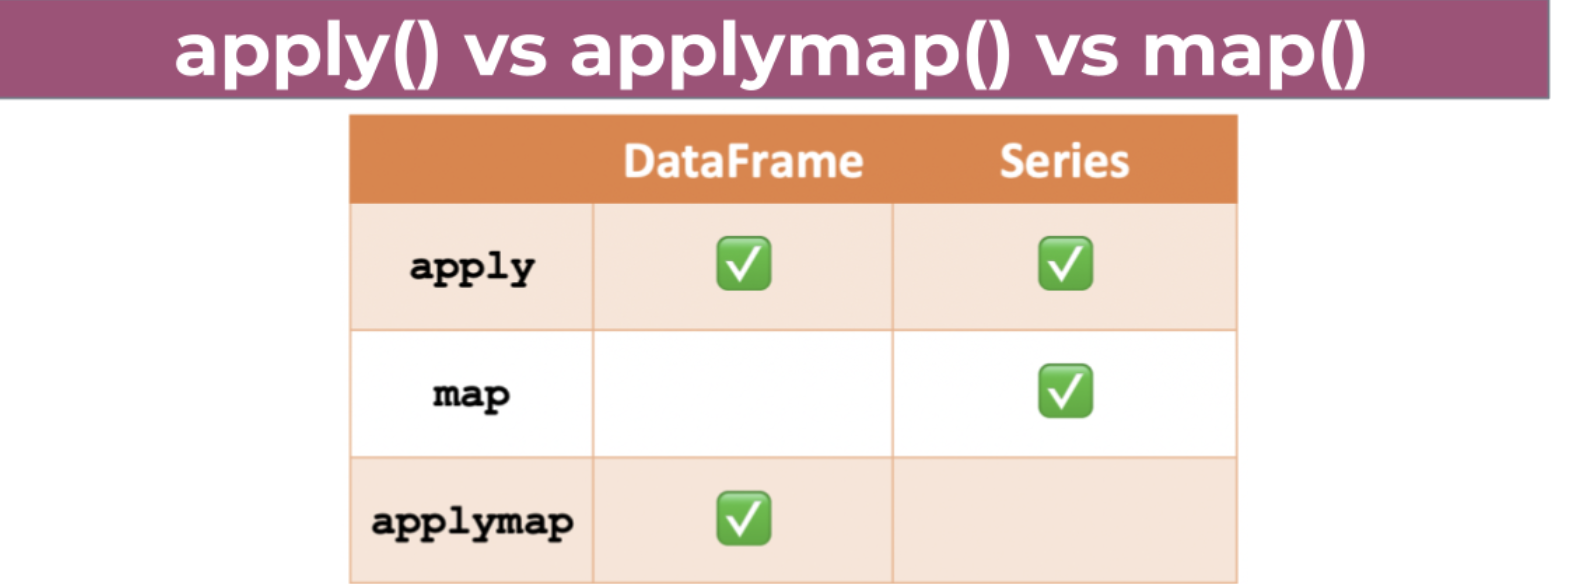

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.transform() vs .apply()</p>

<a id="3.7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### Similarties
- Both apply() and transform() can be used to manipulate the entire DataFrame.
- Both apply() and transform() support lambda expression.
- Both apply() and transform() can be used for manipulating a single column.

In [4]:
import pandas as pd
df5 = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
df5

,A,B
0,1,10
1,2,20
2,3,30


In [147]:
display(df5.apply(lambda x: x+10), df5.transform(lambda x: x+10))

,A,B
0,11,20
1,12,30
2,13,40


,A,B
0,11,20
1,12,30
2,13,40


In [148]:
df5["apply_b"] = df5["B"].apply(lambda x: x+10)
df5["transf_n"] = df5["B"].transform(lambda x: x+10)
df5

,A,B,apply_b,transf_n
0,1,10,20,20
1,2,20,30,30
2,3,30,40,40


### Differences between .apply() and .transform() when manipulating data
- **transform()** cannot produce aggregated results.
- **apply()** works with multiple Series at a time. But, **transform()** is only allowed to work with a single Series at a time.

In [149]:
df5 = df5[["A", "B"]]
df5

,A,B
0,1,10
1,2,20
2,3,30


In [150]:
df5.apply(lambda x: x.sum())

A     6
B    60
dtype: int64

In [152]:
# df5.transform(lambda x: x.sum())    error verir


In [155]:
df5.apply(lambda x : x["B"] - x["A"], axis= 1)

0     9
1    18
2    27
dtype: int64

In [157]:
 # df5.transform(lambda x : x["B"] - x["A"], axis= 1)
# error verir yapamaz

### Differences Between .apply() and .transform() when using them in conjunction with groupby()
- **transform()** returns a DataFrame that has the same length as the input, but **apply()** cannot
- **apply()** works with multiple Series at a time. But, **transform()** is only allowed to work with a single Series at a time.

In [69]:

df6 = pd.DataFrame({'key': ['a','b','c'] * 3,
                    'A': np.arange(9),
                    'B': [1,2,3] * 3})
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [71]:
df6.groupby("key")[["A"]].sum()

,A
key,
a,9
b,12
c,15


In [72]:
# bunu apply ile yapalım
df6.groupby("key")[["A"]].apply(sum)

,A
key,
a,9
b,12
c,15


In [73]:
# transform ile de yapalım nasıl bir sonuc gelecek
df6.groupby("key")[["A"]].transform(sum)

,A
0,9
1,12
2,15
3,9
4,12
5,15
6,9
7,12
8,15


In [159]:
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [74]:
# grupta yukardaki gibi islem yapiyor, ama sadece bir sutunun kendisi icin de islem yapabiliriz transformla.
# ama aynı islem daha kolay yapılabilecegi icin gerek de yok cok.
df6["A"].transform(lambda c: c+5)

0     5
1     6
2     7
3     8
4     9
5    10
6    11
7    12
8    13
Name: A, dtype: int64

In [75]:
# 2 sutunda transform yapalım
df6.groupby("key")[["A", "B"]].transform(sum)
# burada sunu karistirmamamlı: transfor islemi yapmak icin bir sutunu kullanmak baska birsey, onu yapamıyor transfor
# ama burada oldugu gibi iki sutuna yonelik islem yapabiliyor

,A,B
0,9,3
1,12,6
2,15,9
3,9,3
4,12,6
5,15,9
6,9,3
7,12,6
8,15,9


In [76]:
df6[["A", "B"]].transform(lambda c: c+5)

,A,B
0,5,6
1,6,7
2,7,8
3,8,6
4,9,7
5,10,8
6,11,6
7,12,7
8,13,8


In [77]:
df6.groupby("key").apply("mean")

,A,B
key,,
a,3.0,1.0
b,4.0,2.0
c,5.0,3.0


In [80]:
display(df6, df6.groupby("key").apply(lambda x: (x["B"] - x["A"])))
# 2 satırda birlikte islem. transform bunda error veriyor

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


key   
a    0    1
     3   -2
     6   -5
b    1    1
     4   -2
     7   -5
c    2    1
     5   -2
     8   -5
dtype: int64

In [79]:
# burda grup grup yine islem yapabiliriz, ama onun icin meani lambda icinde calistiririz. agg function ile olur bu
df6.groupby("key").apply(lambda x: (x["B"] - x["A"]).mean())

key
a   -2.0
b   -2.0
c   -2.0
dtype: float64

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">pivot() vs pivot_table()</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In order to extract their relationship with numeric and other categorical features, categorical features uses groupby and apply functions. Pivot tables and Stack/Unstack functions are also extremely useful in this context.

# Pivot Table 

Create a spreadsheet-style pivot table as a DataFrame. It accepts three arguments; index, columns, and values. Dataframe's categorical features can be passed in the index and columns. New table's cell values are taken from a column specified by the values parameter.

**pivot_table()**
- pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True).
- Create a spreadsheet-style pivot table as a DataFrame.
- The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

The pivot_table() function is used to create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in **MultiIndex objects (hierarchical indexes)** on the index and columns of the result DataFrame. It allows us to summarize and aggragate the data.

**pivot()**
- DataFrame.pivot(index=None, columns=None, values=None).
- Return reshaped DataFrame organized by given index / column values.
- Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame.
- This function does not support data aggregation, multiple values will result in a MultiIndex in the columns.

The pivot() function is used to reshape a given DataFrame organized by given index / column values. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns.

**Syntax:** DataFrame.pivot(self, index=None, columns=None, values=None)

**Differences**

- aynı itemın 2 farklı valuesu varsa pivot calismiyor; onu pivottable bir agg functionla teke indirerek yapıyor.. bu nedenle pivot table ort, max min vs matematik islemleri yapacagi icin sadece numeric verilerle calisir. ama string varsa pivotla olur bu

- **Pivot_table** is a generalization of pivot that **CAN** handle **duplicate values** for one pivoted index/column pair. However, **pivot()** is used for pivoting without aggregation. Therefore, it **CANNOT** deal with duplicate values for one index/column pair.
- **Pivot_table** will only **allow numeric types as "values=", whereas **pivot** will take string types as "values="**.
- **Pivot_table** also supports using multiple columns for the index.<br> 
[SOURCE](https://www.quora.com/In-pandas-whats-the-difference-between-dataframe-pivot-and-dataframe-pivot_table)

In [108]:
df35 = pd.DataFrame({'fff': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bbb': ['P', 'Q', 'R', 'P', 'Q', 'R'],
                   'baa': [2, 3, 4, 5, 6, 7],
                   'zzz': ['h', 'i', 'j', 'k', 'l', 'm']})
df35

,fff,bbb,baa,zzz
0,one,P,2,h
1,one,Q,3,i
2,one,R,4,j
3,two,P,5,k
4,two,Q,6,l
5,two,R,7,m


In [109]:
df35.pivot(index='fff', columns='bbb', values='baa')

bbb,P,Q,R
fff,,,
one,2,3,4
two,5,6,7


In [110]:
# or we can write it:
df35.pivot(index='fff', columns='bbb')['baa']

bbb,P,Q,R
fff,,,
one,2,3,4
two,5,6,7


In [111]:
# we can also take multiple columns as values
df35.pivot(index='fff', columns='bbb', values=['baa', 'zzz'])

baa       zzz      
bbb   P  Q  R   P  Q  R
fff                    
one   2  3  4   h  i  j
two   5  6  7   k  l  m

In [131]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}

df7 = pd.DataFrame(data)

df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [136]:
df7.pivot_table(index = ["status", "gender"], columns = "sport" , values= ["age", "height"])
# aggfunc default olarak mean

age                               height           \
sport               basketball football tennis voleyball basketball football   
status       gender                                                            
amateur      female        NaN      NaN    NaN      22.0        NaN      NaN   
             male         21.0     23.0    NaN       NaN      196.0    178.0   
professional female       26.0      NaN   24.0       NaN      175.0      NaN   
             male          NaN      NaN   20.0       NaN        NaN      NaN   

                                      
sport               tennis voleyball  
status       gender                   
amateur      female    NaN     182.0  
             male      NaN       NaN  
professional female  172.0       NaN  
             male    185.0       NaN

In [135]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age'],
                aggfunc='mean')

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [84]:
# pivotla birden fazla value ile yapalım 

df7.pivot(index='gender',
          columns='sport',
          values=['age','height','weight'])

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [85]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age','height','weight'],
                aggfunc='mean')

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

**Let's see a difference in terms of aggregate function**

**1. If we have categoric values for value parameter, we can use just "pivot" method.**

In [86]:
df7.pivot(index='gender',
          columns='sport',
          values=['status'])
# kategorik veri valuelar, bu pivot table ile olmaz bu nedenle

status                                 
sport     basketball football        tennis voleyball
gender                                               
female  professional      NaN  professional   amateur
male         amateur  amateur  professional       NaN

In [87]:
# deneyelim
df7.pivot_table(index='gender',
               columns='sport',
               values='status')

/var/folders/kd/j9mqrdy93j33xdby6bflbgt00000gn/T/ipykernel_55978/2418627630.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df7.pivot_table(index='gender',


sport
gender
female
male


**2. If we have duplicate values in column selected for index parameter, we can use just "pivot_table" method.**

In [88]:
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [89]:
# duplicate bir satır olusturalim. 
df7.loc[2,"sport"] = "tennis"
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [90]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age','height','weight'],
                aggfunc='mean')
# female tennisde age, height ve weightlerin meanini aldı duplicate veri oldukları icin.

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN   25.0      22.0        NaN      NaN  173.5   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0        NaN      NaN   60.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [ ]:
# pivotla deneyelim aynısını

In [92]:
# df7.pivot(index='gender',
         # columns='sport',
         # values=['age','height','weight'])
# ValueError: Index contains duplicate entries, cannot reshape

**We can get same results with both groupby and pivot_table**

In [94]:
# pivot table bir gruplama yani aslında
df7.groupby(["gender", "sport"]).mean()

age  height  weight
gender sport                           
female tennis      25.0   173.5    60.0
       voleyball   22.0   182.0    65.0
male   basketball  21.0   196.0    90.0
       football    23.0   178.0    80.0
       tennis      20.0   185.0    83.0

In [95]:
#aynı islemi pivot tablela yapalım
df7.pivot_table(index = ["gender", "sport"], values = ["age", "height", "weight"], aggfunc = "mean")

age  height  weight
gender sport                          
female tennis       25   173.5      60
       voleyball    22   182.0      65
male   basketball   21   196.0      90
       football     23   178.0      80
       tennis       20   185.0      83

In [112]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [113]:
# yolcu sınıflarına göre farklı cinsiyetlerin yas ortalamalalarını bulalım

titanic.pivot_table(values = "age", index = "sex", columns = "class")

# pivot_table'ın icindeki aggfunc parametresi default olarak mean, bu nedenle mean verecek. degistirlebilir

class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [140]:
# groupby ile
titanic.groupby(["sex", "class"])[["age"]].mean().unstack()

age                      
class       First     Second      Third
sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589

In [114]:
titanic.pivot_table(index = "class", columns = "sex")["age"]

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [115]:
# let's check it by a conditional indexing of the average age of the females from the 1st class
titanic[(titanic["sex"]=="female") & (titanic["class"]=="First")][["age"]].mean()

age    34.611765
dtype: float64

In [141]:
# who in which class pay how much? bring max (and then mean-or together) ticket prices

titanic.pivot_table(values= "fare", index = "who", columns = "class", aggfunc = [max, min])

max                      min              
class     First   Second  Third    First Second  Third
who                                                   
child  211.3375  41.5792  46.90  81.8583   14.5  7.225
man    512.3292  73.5000  69.55   0.0000    0.0  0.000
woman  512.3292  65.0000  69.55  25.9292   10.5  6.750

In [117]:
df18 = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
...                          "bar", "bar", "bar", "bar"],
...                    "B": ["one", "one", "one", "two", "two",
...                          "one", "one", "two", "two"],
...                    "C": ["small", "large", "large", "small",
...                          "small", "large", "small", "small",
...                          "large"],
...                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
...                    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

df18

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [118]:
table = pd.pivot_table(df18, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [119]:
# We can also fill missing values using the `fill_value` parameter.
table = pd.pivot_table(df18, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum, fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.stack() & .unstack()</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Reshape using **``stack()``** and **``unstack()``** function in Pandas python: Reshaping the data using **``stack()``** function in pandas converts the data into stacked format .i.e. the column is stacked row wise. When more than one column header is present we can stack the specific column header by specified the level. **``unstack()``** function in pandas converts the data into unstacked format [Source](https://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/).

When you stack a DataFrame, the innermost column index becomes the innermost row index. Unstacking is the inverse operation.

**Why and when should use a stack() and unstack() methods?**

[ANSWER](https://stackoverflow.com/questions/69139030/why-and-when-should-use-a-stack-and-unstack-methods)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">.stack()</p>

<a id="9.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.stack(level=- 1, dropna=True)``**
- Stack the prescribed level(s) from columns to index.
- Return a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame.
- The new inner-most levels are created by pivoting the columns of the current dataframe:
    - if the columns have a single level, the output is a Series;
    - if the columns have multiple levels, the new index level(s) is (are) taken from the prescribed level(s) and the output is a DataFrame.

In [96]:
df7["level"] = ["high", "high", "low", "high", "low", "low"]
df7

,gender,sport,status,age,height,weight,level
0,male,tennis,professional,20,185,83,high
1,female,tennis,professional,24,172,58,high
2,female,tennis,professional,26,175,62,low
3,male,football,amateur,23,178,80,high
4,female,voleyball,amateur,22,182,65,low
5,male,basketball,amateur,21,196,90,low


In [98]:
df8 = df7.pivot_table(index=["gender", "sport"], columns = ["status", "level"],
                      values= ["age", "height", "weight"], aggfunc = "mean")
df8

age                           height         \
status            amateur       professional       amateur          
level                high   low         high   low    high    low   
gender sport                                                        
female tennis         NaN   NaN         24.0  26.0     NaN    NaN   
       voleyball      NaN  22.0          NaN   NaN     NaN  182.0   
male   basketball     NaN  21.0          NaN   NaN     NaN  196.0   
       football      23.0   NaN          NaN   NaN   178.0    NaN   
       tennis         NaN   NaN         20.0   NaN     NaN    NaN   

                                       weight                           
status            professional        amateur       professional        
level                     high    low    high   low         high   low  
gender sport                                                            
female tennis            172.0  175.0     NaN   NaN         58.0  62.0  
       voleyball           NaN    NaN     NaN  65.0          NaN   NaN  
male   basketball          NaN    NaN     NaN  90.0          NaN   NaN  
       football            NaN    NaN    80.0   NaN          NaN   NaN  
       tennis            185.0    NaN     NaN   NaN         83.0   NaN

In [99]:
df8.stack()

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     high      NaN         24.0     NaN        172.0     NaN   
                  low       NaN         26.0     NaN        175.0     NaN   
       voleyball  low      22.0          NaN   182.0          NaN    65.0   
male   basketball low      21.0          NaN   196.0          NaN    90.0   
       football   high     23.0          NaN   178.0          NaN    80.0   
       tennis     high      NaN         20.0     NaN        185.0     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     high          58.0  
                  low           62.0  
       voleyball  low            NaN  
male   basketball low            NaN  
       football   high           NaN  
       tennis     high          83.0

In [100]:
df8.stack(level=-1, dropna = False)
# level default olarak -1 zaten

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     high      NaN         24.0     NaN        172.0     NaN   
                  low       NaN         26.0     NaN        175.0     NaN   
       voleyball  high      NaN          NaN     NaN          NaN     NaN   
                  low      22.0          NaN   182.0          NaN    65.0   
male   basketball high      NaN          NaN     NaN          NaN     NaN   
                  low      21.0          NaN   196.0          NaN    90.0   
       football   high     23.0          NaN   178.0          NaN    80.0   
                  low       NaN          NaN     NaN          NaN     NaN   
       tennis     high      NaN         20.0     NaN        185.0     NaN   
                  low       NaN          NaN     NaN          NaN     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     high          58.0  
                  low           62.0  
       voleyball  high           NaN  
                  low            NaN  
male   basketball high           NaN  
                  low            NaN  
       football   high           NaN  
                  low            NaN  
       tennis     high          83.0  
                  low            NaN

In [101]:
df8.stack(level=-2, dropna = False)
# level hangisini alacagimizi gosteriyor. o levelı endekslere alıyor

age       height        weight      
level                           high   low   high    low   high   low
gender sport      status                                             
female tennis     amateur        NaN   NaN    NaN    NaN    NaN   NaN
                  professional  24.0  26.0  172.0  175.0   58.0  62.0
       voleyball  amateur        NaN  22.0    NaN  182.0    NaN  65.0
                  professional   NaN   NaN    NaN    NaN    NaN   NaN
male   basketball amateur        NaN  21.0    NaN  196.0    NaN  90.0
                  professional   NaN   NaN    NaN    NaN    NaN   NaN
       football   amateur       23.0   NaN  178.0    NaN   80.0   NaN
                  professional   NaN   NaN    NaN    NaN    NaN   NaN
       tennis     amateur        NaN   NaN    NaN    NaN    NaN   NaN
                  professional  20.0   NaN  185.0    NaN   83.0   NaN

In [102]:
df8.stack(level=-3, dropna = False)

status                   amateur        professional       
level                       high    low         high    low
gender sport                                               
female tennis     age        NaN    NaN         24.0   26.0
                  height     NaN    NaN        172.0  175.0
                  weight     NaN    NaN         58.0   62.0
       voleyball  age        NaN   22.0          NaN    NaN
                  height     NaN  182.0          NaN    NaN
                  weight     NaN   65.0          NaN    NaN
male   basketball age        NaN   21.0          NaN    NaN
                  height     NaN  196.0          NaN    NaN
                  weight     NaN   90.0          NaN    NaN
       football   age       23.0    NaN          NaN    NaN
                  height   178.0    NaN          NaN    NaN
                  weight    80.0    NaN          NaN    NaN
       tennis     age        NaN    NaN         20.0    NaN
                  height     NaN    NaN        185.0    NaN
                  weight     NaN    NaN         83.0    NaN

In [103]:
# birden fazla level almak istersek list icinde yazarız 
df8.stack(level=[-1,-2])

age  height  weight
gender sport      level status                            
female tennis     high  professional  24.0   172.0    58.0
                  low   professional  26.0   175.0    62.0
       voleyball  low   amateur       22.0   182.0    65.0
male   basketball low   amateur       21.0   196.0    90.0
       football   high  amateur       23.0   178.0    80.0
       tennis     high  professional  20.0   185.0    83.0

In [104]:
df8.stack(level=[-2,-1])

age  height  weight
gender sport      status       level                      
female tennis     professional high   24.0   172.0    58.0
                               low    26.0   175.0    62.0
       voleyball  amateur      low    22.0   182.0    65.0
male   basketball amateur      low    21.0   196.0    90.0
       football   amateur      high   23.0   178.0    80.0
       tennis     professional high   20.0   185.0    83.0

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">.unstack()</p>

<a id="9.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.unstack(level=- 1, fill_value=None)``**
- Pivot a level of the (necessarily hierarchical) index labels.
- Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.
- If the index is not a MultiIndex, the output will be a Series.

**``unstack()``** function pivots a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels [Source](https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php).

In [105]:
df8

age                           height         \
status            amateur       professional       amateur          
level                high   low         high   low    high    low   
gender sport                                                        
female tennis         NaN   NaN         24.0  26.0     NaN    NaN   
       voleyball      NaN  22.0          NaN   NaN     NaN  182.0   
male   basketball     NaN  21.0          NaN   NaN     NaN  196.0   
       football      23.0   NaN          NaN   NaN   178.0    NaN   
       tennis         NaN   NaN         20.0   NaN     NaN    NaN   

                                       weight                           
status            professional        amateur       professional        
level                     high    low    high   low         high   low  
gender sport                                                            
female tennis            172.0  175.0     NaN   NaN         58.0  62.0  
       voleyball           NaN    NaN     NaN  65.0          NaN   NaN  
male   basketball          NaN    NaN     NaN  90.0          NaN   NaN  
       football            NaN    NaN    80.0   NaN          NaN   NaN  
       tennis            185.0    NaN     NaN   NaN         83.0   NaN

In [106]:
df8.unstack()
# satırdan sutuna atiyor unstack de. sutunun -1i yaptı

age                                                       \
status    amateur                                                        
level        high                                  low                   
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN    NaN       NaN        NaN      NaN    NaN   
male          NaN     23.0    NaN       NaN       21.0      NaN    NaN   

                                        ...  weight                         \
status           professional           ... amateur           professional   
level                    high           ...     low                   high   
sport  voleyball   basketball football  ...  tennis voleyball   basketball   
gender                                  ...                                  
female      22.0          NaN      NaN  ...     NaN      65.0          NaN   
male         NaN          NaN      NaN  ...     NaN       NaN          NaN   

                                                                       
status                                                                 
level                                   low                            
sport  football tennis voleyball basketball football tennis voleyball  
gender                                                                 
female      NaN   58.0       NaN        NaN      NaN   62.0       NaN  
male        NaN   83.0       NaN        NaN      NaN    NaN       NaN  

[2 rows x 48 columns]

In [107]:
df8.unstack(level=-1, fill_value= "-")
# datadaki missing valueları - ile doldur dedik, istedigimiz degeri yazabiliriz.fill_value default olarak None
# asagidaki NaN'lar zaten df'in orjinalinde olan NaN'lar. fill_value unstack islemi sonucu olusan NaNlara value yapıyor

age                                                       \
status    amateur                                                        
level        high                                  low                   
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female          -        -    NaN       NaN          -        -    NaN   
male          NaN     23.0    NaN         -       21.0      NaN    NaN   

                                        ...  weight                         \
status           professional           ... amateur           professional   
level                    high           ...     low                   high   
sport  voleyball   basketball football  ...  tennis voleyball   basketball   
gender                                  ...                                  
female      22.0            -        -  ...     NaN      65.0            -   
male           -          NaN      NaN  ...     NaN         -          NaN   

                                                                       
status                                                                 
level                                   low                            
sport  football tennis voleyball basketball football tennis voleyball  
gender                                                                 
female        -   58.0       NaN          -        -   62.0       NaN  
male        NaN   83.0         -        NaN      NaN    NaN         -  

[2 rows x 48 columns]

In [120]:
df19 = pd.DataFrame({"A": ["foo", "foo", "foo","bar", "bar", "bar"],
...                    "B": ["one", "one", "two", "two","one", "one"],
...                    "C": ["x", "y", "x", "y","x", "y"],
...                    "D": [1, 3, 2, 4, 5, 1]})

df19

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,4
4,bar,one,x,5
5,bar,one,y,1


In [121]:
df19.groupby(["A", "B", "C"])[["D"]].aggregate(["mean"]).stack()

D
A   B   C          
bar one x mean  5.0
        y mean  1.0
    two y mean  4.0
foo one x mean  1.0
        y mean  3.0
    two x mean  2.0

In [122]:
df19.groupby(["A", "B", "C"])[["D"]].aggregate("mean").stack()

A    B    C   
bar  one  x  D    5.0
          y  D    1.0
     two  y  D    4.0
foo  one  x  D    1.0
          y  D    3.0
     two  x  D    2.0
dtype: float64

In [123]:
df19.groupby(["A", "B", "C"])[["D"]].aggregate(["mean"]).unstack()

D     
        mean     
C          x    y
A   B            
bar one  5.0  1.0
    two  NaN  4.0
foo one  1.0  3.0
    two  2.0  NaN

In [124]:
df19.groupby(["A", "B", "C"])[["D"]].aggregate(["mean"]).unstack().unstack()

D               
    mean               
C      x         y     
B    one  two  one  two
A                      
bar  5.0  NaN  1.0  4.0
foo  1.0  2.0  3.0  NaN